# Brendan Egan
# Seth Berry
# Unstructured Data Analytics
# Final Project Visualizations

All the packages you need to create the visualizations as well as where data is stored

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


player_data = pd.read_csv("C:/users/eganb/Downloads/soccer_data/player_scraped_data.csv")
print(player_data.columns)

team_data = pd.read_csv("C:/users/eganb/Downloads/soccer_data/understat_teams_data.csv")
print(team_data.columns)

Index(['season', 'league', 'player', 'team', 'position', 'games', 'minutes',
       'goals', 'assists', 'shots', 'key_passes', 'yellow_cards', 'red_cards',
       'non_penalty_goals', 'xg', 'xa', 'npxg', 'xg_chain', 'xg_buildup',
       'goals_per90', 'assists_per90', 'xg_per90', 'xa_per90',
       'goal_contributions', 'xg_overperformance'],
      dtype='object')
Index(['season', 'league', 'position', 'team', 'points', 'games_played',
       'wins', 'draws', 'losses', 'goals_scored', 'goals_conceded',
       'goal_diff', 'xg', 'xga', 'xg_diff'],
      dtype='object')


Quick sanity check by printing out the columns so I can see all that is from my datasets. 

For this project I want to show the best teams, goal scorers and chance creators (highest expected assist rate) across ten seasons. 

I want to use the data I have previously collected to show visualizations that show players worthy of their contracts. 


Really... funny (if you want to call it that) part about these visualizations is that it took me an extra three days to scrape La Liga data. Why do I bring that up? THERE IS NO LA LIGA PLAYER OR TEAM IN THE TOP 10 OF THE CATEGORIES I SELECTED. However, how lucky am I to have been given a challenege to go and find more data! 

It gave me more practice scraping and reading documentation, so who is the real winner (probably not me).

### Top 10 Point total Finishers by League (2015-2024)

I wanted to see which teams finished with the most amount of points across the 10 seasons. 

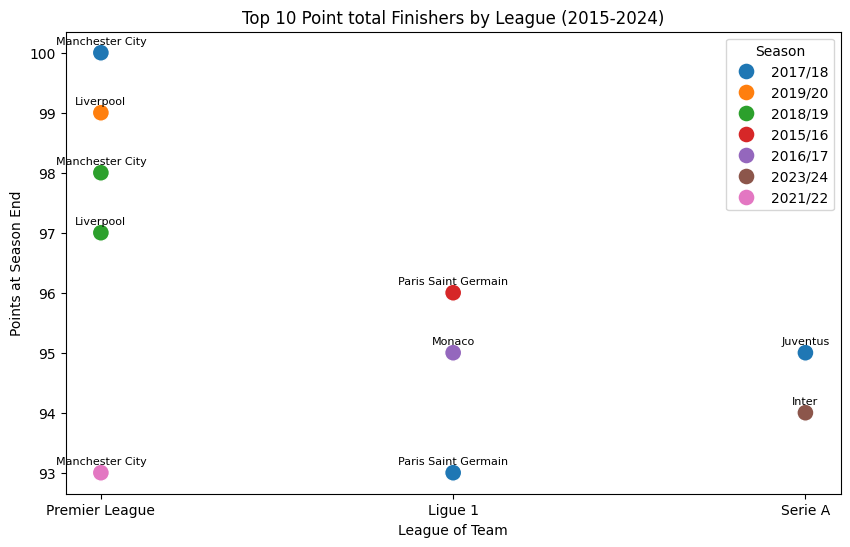

In [ ]:
top_10_teams = team_data.sort_values("points", ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=top_10_teams, x="league", y="points", hue="season", s=150)

#Label each dot w/associated team name
for _, row in top_10_teams.iterrows():
    ax.text(
        row["league"],
        row["points"] + 0.1,
        row["team"],
        ha="center",
        va="bottom",
        fontsize=8)

plt.title("Top 10 Point total Finishers by League (2015-2024)")
plt.xlabel("League of Team")
plt.ylabel("Points at Season End")
plt.legend(title="Season", loc="upper right")
plt.show()

Man City in 2017/2018 were the first team in Premier League history to hit the 100 points mark and were one of the best teams in European soccer at the time. During the 2018/2019 season, the race for the Premier League title was decided by a singular point (the drama...) and is considered one of the most dramatic Premier League finishes in recent memory. Both sides were dominant in the UEFA Champions League and considerably dominated most other English sides they went up against.

### Top 10 xG Finishers by League (2015-2024)

The following visual is here to show the best players by xG (they put lots of shots on target from dangerous areas on the field)

I used the same code to print player names next to their stats so it was obvious who it is and what season they accomplished the feat.

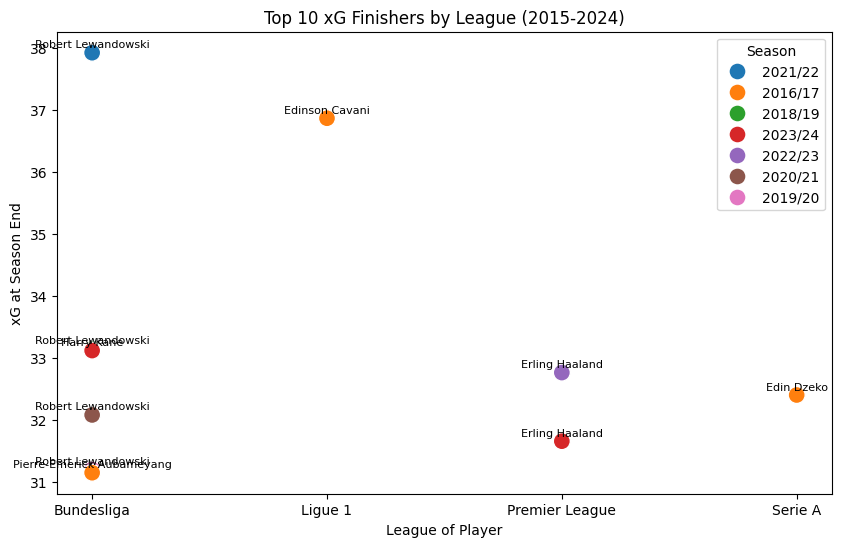

In [23]:
top_10_xG = player_data.sort_values("xg", ascending=False).head(10)

plt.figure(figsize=(10, 6))
az = sns.scatterplot(data=top_10_xG, x="league", y="xg", hue="season", s=150)

for _, row in top_10_xG.iterrows():
    az.text(
        row["league"],
        row["xg"] + 0.05,   
        row["player"],
        ha="center",
        va="bottom",
        fontsize=8)

plt.title("Top 10 xG Finishers by League (2015-2024)")
plt.xlabel("League of Player")
plt.ylabel("xG at Season End")
plt.legend(title="Season", loc="upper right")
plt.show()

Erling Haaland being on here twice proves that he might just be worth his hefty pricetag of £500,000 per week. Yes you read that right he makes £1,000,000 every two weeks he has a pulse during his current project. At just 25 years old he has 107 Premier League goals in only 4 seasons and he shows absolutely no signs of slowing down. 

Edin Dzeko was 30 years old on an AS Roma team that prided itself on crosses into the box, and he was the perfect player for that role. He made his money by sitting in the box being the 'old school' striker that pounces on any chance he got. Serie A is known as a defense heavy league, so for a striker from that league to have made it in the top 10 might need to be weighted more than Ligue 1. 

Robert Lewandowski scored a record breaking 35 Bundesliga goals during the 2021/2022 campaign and won the European Golden Boot (top goalscorer in European leagues) he was then rewarded with a move to FC Barcelona in the summer following that season. He is listed here from multiple seasons, and was a dominant striker during his time at FC Bayern Munich. 


The 4 sets of names who are overlapping are (31 goals) Robert Lewandowski & Pierre-Emerick Aubameyang and (33 goals) Robert Lewandowski & Harry Kane 

### Top 10 xA (Chance Creators) by League (2015-2024)

Now, I want to show who were the best chance creators across the timeframe that was scraped.

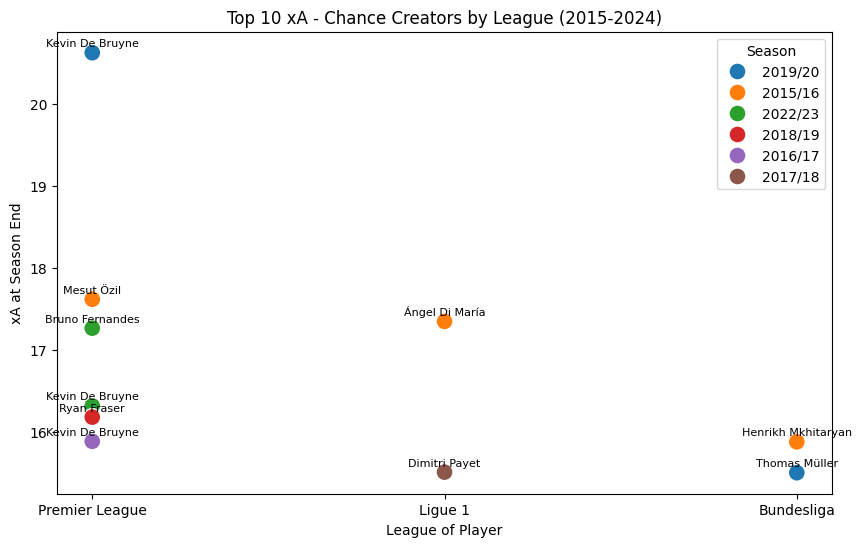

In [19]:
top_10_xA = player_data.sort_values("xa", ascending=False).head(10)

plt.figure(figsize= (10, 6))
ay = sns.scatterplot(data= top_10_xA, x="league", y="xa", hue="season", s=150)

for _, row in top_10_xA.iterrows():
    ay.text(
        row["league"],
        row["xa"] + 0.05,   
        row["player"],
        ha="center",
        va="bottom",
        fontsize=8)

plt.title("Top 10 xA - Chance Creators by League (2015-2024)")
plt.xlabel("League of Player")
plt.ylabel("xA at Season End")
plt.legend(title="Season", loc="upper right")
plt.show()

## In the future:

I would love to scrape contract data for players (I assume that will be a little more difficult to get entire clubs wage bills [youth players and senior teams]). I will probably need a lot more time on my hands and a little bit more practice with scraping. I need to find a website that would actually show each club's wage bill and then I would have to scrape that to be able to attempt and compare contract value to stats. The current issue with that is that there is not one specific website that will have all this data, and I would need to scrape through multiple websites if I want to gather contract information. When I complete that data collection, I want to create a model to predict future player contract value based on previous stats and what league they are playing in. I just need to connect individual player data to their current and previous contracts to get my first steps a model is much further down the line. 